Files already downloaded and verified
Files already downloaded and verified


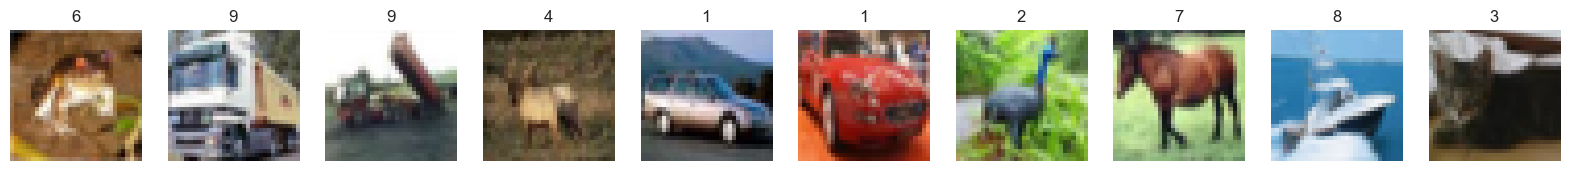

In [1]:
import random
import numpy as np
import tqdm
# Load dataset in Pytorch dataset class

from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch

plt.rcParams["figure.figsize"] = (20, 10)


def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)


set_random_seed(432)

trainset = datasets.CIFAR10("/datasets", train=True, download=True)
testset = datasets.CIFAR10("/datasets", train=False, download=True)

# Display some samples
for j in range(10):
    image, class_num = trainset[j]
    plt.subplot(1, 10, j + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(str(class_num))

In [2]:
# Validation function. Don't change it
def validate(model, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            outputs = model(images)

            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct / total

In [3]:
trainset[0]

(<PIL.Image.Image image mode=RGB size=32x32>, 6)

In [4]:
import torch.nn as nn
import torch
import torch.nn.functional as F

set_random_seed(432)


class TwoLayerFCN(nn.Module):
    def __init__(self, class_nums=10, act=nn.ReLU()):
        super().__init__()
        # Define two layer fully - connected network with linear layers: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear
        self.fc1 = nn.Linear(32 * 32 * 3, 1536)
        self.fc2 = nn.Linear(1536, class_nums)
        self.act = act

    def forward(self, x):
        # Preprocess image, remember that first dimension is batch dimension !
        # x: (batch_size, n_channels, height, width)
        x = nn.Flatten()(x)
        x = self.fc1(x)
        x = self.act(x)
        x = self.fc2(x)

        return x

In [5]:
# Prepare the data
transform = transforms.Compose([
    transforms.ToTensor(),  # Pil Image to Pytorch tensor
    transforms.Normalize((0.491, 0.482, 0.446), (0.247, 0.243, 0.261))
    # https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Normalize
])

trainset.transform = transform
testset.transform = transform

train_loader = DataLoader(trainset, batch_size=512, shuffle=True)
test_loader = DataLoader(testset, batch_size=256, shuffle=False)

In [6]:
from torch import optim
import tqdm

# Train the model
# You may change loss function, learning rate and number of epochs

model = TwoLayerFCN(10)

# By default cross-entropy loss used, you can change it to another loss function
criterion = nn.CrossEntropyLoss()

# You can change learning rate and number of epoch too
optimizer = optim.SGD(model.parameters(), lr=0.01)


def train_fcn(model, optimizer, criterion, epochs=25):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for img_batch, labels_batch in tqdm.tqdm(train_loader):
            y_pred = model(img_batch)

            loss = criterion(y_pred, labels_batch)
            total_loss += loss

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        loss = total_loss / len(train_loader)
        accuracy = validate(model, test_loader)
        print("Epoch {} Mean Loss {:.2f} Accuracy {:.2f}".format(epoch, loss.item(), accuracy))


In [7]:
train_fcn(model, optimizer, criterion)

100%|██████████| 98/98 [00:17<00:00,  5.76it/s]


Epoch 0 Mean Loss 1.98 Accuracy 0.37


100%|██████████| 98/98 [00:15<00:00,  6.26it/s]


Epoch 1 Mean Loss 1.79 Accuracy 0.40


100%|██████████| 98/98 [00:13<00:00,  7.15it/s]


Epoch 2 Mean Loss 1.72 Accuracy 0.42


100%|██████████| 98/98 [00:13<00:00,  7.11it/s]


Epoch 3 Mean Loss 1.67 Accuracy 0.43


100%|██████████| 98/98 [00:13<00:00,  7.10it/s]


Epoch 4 Mean Loss 1.63 Accuracy 0.44


100%|██████████| 98/98 [00:13<00:00,  7.15it/s]


Epoch 5 Mean Loss 1.60 Accuracy 0.45


100%|██████████| 98/98 [00:13<00:00,  7.12it/s]


Epoch 6 Mean Loss 1.57 Accuracy 0.46


100%|██████████| 98/98 [00:13<00:00,  7.16it/s]


Epoch 7 Mean Loss 1.55 Accuracy 0.46


100%|██████████| 98/98 [00:13<00:00,  7.22it/s]


Epoch 8 Mean Loss 1.53 Accuracy 0.47


100%|██████████| 98/98 [00:13<00:00,  7.22it/s]


Epoch 9 Mean Loss 1.51 Accuracy 0.47


100%|██████████| 98/98 [00:13<00:00,  7.20it/s]


Epoch 10 Mean Loss 1.50 Accuracy 0.47


100%|██████████| 98/98 [00:13<00:00,  7.21it/s]


Epoch 11 Mean Loss 1.48 Accuracy 0.48


100%|██████████| 98/98 [00:13<00:00,  7.18it/s]


Epoch 12 Mean Loss 1.46 Accuracy 0.48


100%|██████████| 98/98 [00:13<00:00,  7.25it/s]


Epoch 13 Mean Loss 1.45 Accuracy 0.48


100%|██████████| 98/98 [00:13<00:00,  7.22it/s]


Epoch 14 Mean Loss 1.44 Accuracy 0.49


100%|██████████| 98/98 [00:13<00:00,  7.20it/s]


Epoch 15 Mean Loss 1.42 Accuracy 0.49


100%|██████████| 98/98 [00:13<00:00,  7.08it/s]


Epoch 16 Mean Loss 1.41 Accuracy 0.49


100%|██████████| 98/98 [00:13<00:00,  7.20it/s]


Epoch 17 Mean Loss 1.40 Accuracy 0.49


100%|██████████| 98/98 [00:13<00:00,  7.20it/s]


Epoch 18 Mean Loss 1.39 Accuracy 0.50


100%|██████████| 98/98 [00:13<00:00,  7.22it/s]


Epoch 19 Mean Loss 1.37 Accuracy 0.50


100%|██████████| 98/98 [00:13<00:00,  7.20it/s]


Epoch 20 Mean Loss 1.36 Accuracy 0.50


100%|██████████| 98/98 [00:13<00:00,  7.27it/s]


Epoch 21 Mean Loss 1.35 Accuracy 0.51


100%|██████████| 98/98 [00:13<00:00,  7.25it/s]


Epoch 22 Mean Loss 1.34 Accuracy 0.51


100%|██████████| 98/98 [00:13<00:00,  7.15it/s]


Epoch 23 Mean Loss 1.33 Accuracy 0.50


100%|██████████| 98/98 [00:13<00:00,  7.23it/s]


Epoch 24 Mean Loss 1.32 Accuracy 0.51


In [8]:
print(f'Final accuracy: {validate(model, test_loader)}')

Final accuracy: 0.5075


## Ideas for extra work

* Compare different optimizators 
* Compare different Activation functions
* Evaluate Batch Normalization effect (need a deeper network)

In [9]:
# Trying my favorite optimizer
model = TwoLayerFCN(10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=7e-4)

train_fcn(model, optimizer, criterion)

100%|██████████| 98/98 [00:15<00:00,  6.37it/s]


Epoch 0 Mean Loss 1.74 Accuracy 0.47


100%|██████████| 98/98 [00:15<00:00,  6.41it/s]


Epoch 1 Mean Loss 1.43 Accuracy 0.49


100%|██████████| 98/98 [00:15<00:00,  6.41it/s]


Epoch 2 Mean Loss 1.33 Accuracy 0.50


100%|██████████| 98/98 [00:15<00:00,  6.36it/s]


Epoch 3 Mean Loss 1.24 Accuracy 0.51


100%|██████████| 98/98 [00:15<00:00,  6.39it/s]


Epoch 4 Mean Loss 1.18 Accuracy 0.52


100%|██████████| 98/98 [00:15<00:00,  6.41it/s]


Epoch 5 Mean Loss 1.11 Accuracy 0.53


100%|██████████| 98/98 [00:15<00:00,  6.37it/s]


Epoch 6 Mean Loss 1.05 Accuracy 0.52


100%|██████████| 98/98 [00:15<00:00,  6.40it/s]


Epoch 7 Mean Loss 0.98 Accuracy 0.53


100%|██████████| 98/98 [00:15<00:00,  6.44it/s]


Epoch 8 Mean Loss 0.92 Accuracy 0.53


100%|██████████| 98/98 [00:15<00:00,  6.39it/s]


Epoch 9 Mean Loss 0.87 Accuracy 0.53


100%|██████████| 98/98 [00:15<00:00,  6.40it/s]


Epoch 10 Mean Loss 0.80 Accuracy 0.53


100%|██████████| 98/98 [00:15<00:00,  6.37it/s]


Epoch 11 Mean Loss 0.75 Accuracy 0.52


100%|██████████| 98/98 [00:15<00:00,  6.41it/s]


Epoch 12 Mean Loss 0.69 Accuracy 0.53


100%|██████████| 98/98 [00:15<00:00,  6.40it/s]


Epoch 13 Mean Loss 0.65 Accuracy 0.54


100%|██████████| 98/98 [00:15<00:00,  6.38it/s]


Epoch 14 Mean Loss 0.61 Accuracy 0.54


100%|██████████| 98/98 [00:15<00:00,  6.38it/s]


Epoch 15 Mean Loss 0.55 Accuracy 0.53


100%|██████████| 98/98 [00:15<00:00,  6.36it/s]


Epoch 16 Mean Loss 0.51 Accuracy 0.52


100%|██████████| 98/98 [00:15<00:00,  6.38it/s]


Epoch 17 Mean Loss 0.48 Accuracy 0.54


100%|██████████| 98/98 [00:15<00:00,  6.40it/s]


Epoch 18 Mean Loss 0.45 Accuracy 0.53


100%|██████████| 98/98 [00:15<00:00,  6.42it/s]


Epoch 19 Mean Loss 0.42 Accuracy 0.53


100%|██████████| 98/98 [00:15<00:00,  6.35it/s]


Epoch 20 Mean Loss 0.40 Accuracy 0.54


100%|██████████| 98/98 [00:15<00:00,  6.42it/s]


Epoch 21 Mean Loss 0.34 Accuracy 0.53


100%|██████████| 98/98 [00:15<00:00,  6.43it/s]


Epoch 22 Mean Loss 0.31 Accuracy 0.53


100%|██████████| 98/98 [00:15<00:00,  6.30it/s]


Epoch 23 Mean Loss 0.26 Accuracy 0.54


100%|██████████| 98/98 [00:15<00:00,  6.40it/s]


Epoch 24 Mean Loss 0.26 Accuracy 0.54


In [10]:
# Trying other activations
model = TwoLayerFCN(10, nn.Sigmoid())
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=7e-4)

train_fcn(model, optimizer, criterion, epochs=10)

100%|██████████| 98/98 [00:15<00:00,  6.39it/s]


Epoch 0 Mean Loss 1.79 Accuracy 0.42


100%|██████████| 98/98 [00:15<00:00,  6.35it/s]


Epoch 1 Mean Loss 1.63 Accuracy 0.44


100%|██████████| 98/98 [00:15<00:00,  6.39it/s]


Epoch 2 Mean Loss 1.55 Accuracy 0.46


100%|██████████| 98/98 [00:15<00:00,  6.39it/s]


Epoch 3 Mean Loss 1.48 Accuracy 0.47


100%|██████████| 98/98 [00:15<00:00,  6.30it/s]


Epoch 4 Mean Loss 1.42 Accuracy 0.48


100%|██████████| 98/98 [00:15<00:00,  6.37it/s]


Epoch 5 Mean Loss 1.35 Accuracy 0.49


100%|██████████| 98/98 [00:15<00:00,  6.38it/s]


Epoch 6 Mean Loss 1.28 Accuracy 0.48


100%|██████████| 98/98 [00:15<00:00,  6.31it/s]


Epoch 7 Mean Loss 1.21 Accuracy 0.50


100%|██████████| 98/98 [00:15<00:00,  6.40it/s]


Epoch 8 Mean Loss 1.14 Accuracy 0.50


100%|██████████| 98/98 [00:15<00:00,  6.37it/s]


Epoch 9 Mean Loss 1.08 Accuracy 0.50


In [11]:
model = TwoLayerFCN(10, nn.Tanh())
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=7e-4)

train_fcn(model, optimizer, criterion, epochs=10)

100%|██████████| 98/98 [00:15<00:00,  6.33it/s]


Epoch 0 Mean Loss 1.87 Accuracy 0.43


100%|██████████| 98/98 [00:15<00:00,  6.43it/s]


Epoch 1 Mean Loss 1.61 Accuracy 0.44


100%|██████████| 98/98 [00:15<00:00,  6.43it/s]


Epoch 2 Mean Loss 1.49 Accuracy 0.46


100%|██████████| 98/98 [00:15<00:00,  6.39it/s]


Epoch 3 Mean Loss 1.38 Accuracy 0.47


100%|██████████| 98/98 [00:15<00:00,  6.44it/s]


Epoch 4 Mean Loss 1.28 Accuracy 0.48


100%|██████████| 98/98 [00:15<00:00,  6.38it/s]


Epoch 5 Mean Loss 1.19 Accuracy 0.48


100%|██████████| 98/98 [00:15<00:00,  6.38it/s]


Epoch 6 Mean Loss 1.10 Accuracy 0.49


100%|██████████| 98/98 [00:15<00:00,  6.41it/s]


Epoch 7 Mean Loss 1.00 Accuracy 0.48


100%|██████████| 98/98 [00:15<00:00,  6.32it/s]


Epoch 8 Mean Loss 0.92 Accuracy 0.48


100%|██████████| 98/98 [00:15<00:00,  6.43it/s]


Epoch 9 Mean Loss 0.84 Accuracy 0.48


Заключение:
Написал полносвязную нейронную сеть с двумя слоями и побил качество предыдущего подхода на 0.15 даже с такой примитивной архитектурой
Попробовал разные оптимизаторы, а именно на мой взгляд самый продвинтый - Adam
Попробовал активации, кроме relu